In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'] = (df['Species'] == 'Iris-setosa').astype(int)
df = df.drop(columns=['Id'])
data = df.values[:, 0:3]
category = df.values[:, 3]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


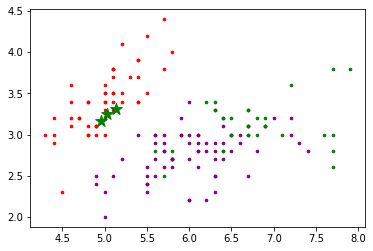

In [4]:
k = 3

n = data.shape[0]

c = data.shape[1]

mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

colors=['red', 'purple', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [5]:
centers_new = centers
centers_old = np.zeros(centers.shape)
data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))
error = np.linalg.norm(centers_new - centers_old)
Sum_of_squared_distances = []
while error != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = (centers_new)
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    Sum_of_squared_distances.append((clusters**2).sum())
  

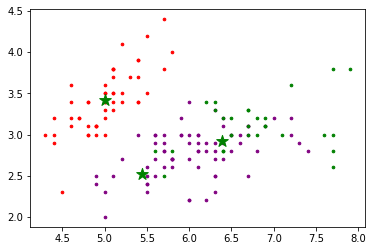

In [6]:
colors=['red', 'purple', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
    
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
